## Lecture 07 - Neural Network, Tensorflow, Single Neuron, Multi-layer Neural Network

## Install tensorflow
```pip install --upgrade pip```

```pip install tensorflow```

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import roc_auc_score, accuracy_score

In [11]:
logData=pd.read_csv("./Data/logistic_regression_optimization.csv")

In [14]:
x = logData.iloc[:, 0:-1].values
y = logData.iloc[:, -1:].values

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression(penalty='none', solver='lbfgs').fit(x, y)#Build a Logistic Regression Model
print([clf.coef_, clf.intercept_])

[array([[3.83389295, 1.1991905 , 4.52605611]]), array([-4.92802048])]


/Users/dlai/Projects/Foundations_of_Analytics/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Logistic regression with a single neuron Neural Network

### Create a nerual network of 1 neuron an 3 inputs  $x_1, x_2, x_3$ and that output $a$
i.e.
### $p=a=\frac{1}{1+exp\left(-(w_0+w_1 x_1+w_2 x_2+w_3 x_3)\right)}$

Loss function: binary_crossentropy which is

### $L=-\sum\limits_{i=1}^{N}(y^ilog(a^i)+(1-y^i)log(1-a^i))$
which is equivalent to binomial likelihood function except for a negative sign


In [22]:
model = tf.keras.Sequential() # start a sequential neuron
model.add(layers.Dense(1, input_shape=(3,),use_bias=True, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='binary_crossentropy', metrics=['accuracy']) # define loss function and optimization methods

In [23]:
model.get_weights() #initial weights

[array([[ 0.57813585],
        [-0.8589465 ],
        [-0.80017877]], dtype=float32),
 array([0.], dtype=float32)]

In [24]:
testinput=np.array([0, 1, 0])
1/(1+np.exp(-np.dot(model.get_weights()[0].reshape(-1),testinput))) #logistic function

0.2975594985190892

In [25]:
np.array(model(np.array([[0, 1, 0]])))

array([[0.2975595]], dtype=float32)

In [26]:
model.fit(x, y, epochs=200,validation_split=0.2, batch_size=50)

Epoch 1/200
80/80 [==============================] - 0s 3ms/step - loss: 1.4724 - accuracy: 0.5067 - val_loss: 0.6176 - val_accuracy: 0.6870
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8328 - val_loss: 0.2683 - val_accuracy: 0.9240
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.9285 - val_loss: 0.2121 - val_accuracy: 0.9550
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.9398 - val_loss: 0.1827 - val_accuracy: 0.9610
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9470 - val_loss: 0.1645 - val_accuracy: 0.9660
Epoch 6/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.9465 - val_loss: 0.1514 - val_accuracy: 0.9660
Epoch 7/200
80/80 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 0.9473 - val_loss: 0.1420 - val_accuracy: 0.9670
Epoch 8/200
8

Epoch 59/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.9498 - val_loss: 0.0908 - val_accuracy: 0.9660
Epoch 60/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9498 - val_loss: 0.0904 - val_accuracy: 0.9670
Epoch 61/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9492 - val_loss: 0.0901 - val_accuracy: 0.9670
Epoch 62/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9488 - val_loss: 0.0902 - val_accuracy: 0.9670
Epoch 63/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9490 - val_loss: 0.0903 - val_accuracy: 0.9670
Epoch 64/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.9485 - val_loss: 0.0899 - val_accuracy: 0.9680
Epoch 65/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9488 - val_loss: 0.0903 - val_accuracy: 0.9670
Epoch 

80/80 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9492 - val_loss: 0.0895 - val_accuracy: 0.9670
Epoch 117/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.9490 - val_loss: 0.0895 - val_accuracy: 0.9670
Epoch 118/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9492 - val_loss: 0.0898 - val_accuracy: 0.9660
Epoch 119/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9498 - val_loss: 0.0894 - val_accuracy: 0.9670
Epoch 120/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1139 - accuracy: 0.9492 - val_loss: 0.0893 - val_accuracy: 0.9660
Epoch 121/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9490 - val_loss: 0.0904 - val_accuracy: 0.9650
Epoch 122/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9492 - val_loss: 0.0898 - val_accuracy: 0.9660
Epoch 123/200

80/80 [==============================] - 0s 3ms/step - loss: 0.1133 - accuracy: 0.9490 - val_loss: 0.0894 - val_accuracy: 0.9680
Epoch 174/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9498 - val_loss: 0.0896 - val_accuracy: 0.9670
Epoch 175/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9490 - val_loss: 0.0894 - val_accuracy: 0.9670
Epoch 176/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9488 - val_loss: 0.0895 - val_accuracy: 0.9670
Epoch 177/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9482 - val_loss: 0.0900 - val_accuracy: 0.9660
Epoch 178/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9500 - val_loss: 0.0893 - val_accuracy: 0.9660
Epoch 179/200
80/80 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9492 - val_loss: 0.0895 - val_accuracy: 0.9670
Epoch 180/200

In [27]:
model.get_weights()

[array([[3.7115893],
        [1.1391014],
        [4.426828 ]], dtype=float32),
 array([-4.8072014], dtype=float32)]

In [30]:
import matplotlib.pyplot as plt

In [58]:
np.argmin(model.history.history['val_loss'])

186

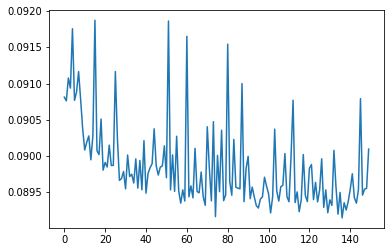

In [56]:
plt.plot(model.history.history['val_loss'][50:200])

### Final Neural Network

In [59]:
model = tf.keras.Sequential() # start a sequential neuron
model.add(layers.Dense(1, input_shape=(3,),use_bias=True, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='binary_crossentropy', metrics=['accuracy']) # define loss function and optimization methods
model.fit(x, y, epochs=186, batch_size=50, verbose=0)

In [60]:
model.get_weights()

[array([[3.8468232],
        [1.2185234],
        [4.5165977]], dtype=float32),
 array([-4.9375563], dtype=float32)]

## Fashion MNIST classification model

In [61]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

**** Notes ****

In Mac Run the following command first if you encounter security warning

```open /Applications/Python\ 3.7/Install\ Certificates.command```

Example URL: https://www.tensorflow.org/tutorials/keras/classification

In [62]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [63]:
train_images.shape

(60000, 28, 28)

In [65]:
train_images[1].shape

(28, 28)

In [68]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

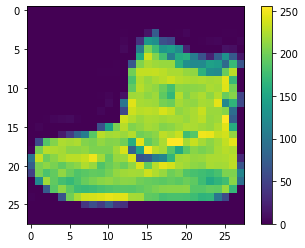

In [67]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [69]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #input layer
    keras.layers.Dense(128, activation='relu'), #hidden layer
    keras.layers.Dense(10, activation='softmax') #Output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
model.fit(train_images, train_labels, epochs=10,validation_split=0.2, batch_size=10)

Epoch 1/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.6992 - accuracy: 0.7248 - val_loss: 0.7136 - val_accuracy: 0.7130
Epoch 2/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.7093 - accuracy: 0.7236 - val_loss: 0.7306 - val_accuracy: 0.7292
Epoch 3/10
4800/4800 [==============================] - 9s 2ms/step - loss: 0.7017 - accuracy: 0.7228 - val_loss: 0.7836 - val_accuracy: 0.6988
Epoch 4/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.7040 - accuracy: 0.7279 - val_loss: 0.7647 - val_accuracy: 0.7163
Epoch 5/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.7001 - accuracy: 0.7263 - val_loss: 0.7464 - val_accuracy: 0.7139
Epoch 6/10
4800/4800 [==============================] - 13s 3ms/step - loss: 0.7115 - accuracy: 0.7249 - val_loss: 0.7203 - val_accuracy: 0.7382
Epoch 7/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.6844 - accuracy: 0.7308 - val_loss: 0.6944 - val_acc

In [78]:
np.argmin(model.history.history['val_loss'])

6

In [79]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #input layer
    keras.layers.Dense(128, activation='relu'), #hidden layer
    keras.layers.Dense(10, activation='softmax') #Output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=7,validation_split=0.2, batch_size=10)

Epoch 1/7
4800/4800 [==============================] - 11s 2ms/step - loss: 2.1527 - accuracy: 0.6913 - val_loss: 0.7004 - val_accuracy: 0.7498
Epoch 2/7
4800/4800 [==============================] - 11s 2ms/step - loss: 0.6974 - accuracy: 0.7706 - val_loss: 0.6857 - val_accuracy: 0.7888
Epoch 3/7
4800/4800 [==============================] - 12s 2ms/step - loss: 0.6734 - accuracy: 0.7837 - val_loss: 0.7006 - val_accuracy: 0.7284
Epoch 4/7
4800/4800 [==============================] - 11s 2ms/step - loss: 0.6332 - accuracy: 0.7986 - val_loss: 0.7092 - val_accuracy: 0.7691
Epoch 5/7
4800/4800 [==============================] - 13s 3ms/step - loss: 0.6227 - accuracy: 0.8028 - val_loss: 0.5515 - val_accuracy: 0.8203
Epoch 6/7
4800/4800 [==============================] - 12s 2ms/step - loss: 0.6167 - accuracy: 0.8057 - val_loss: 0.6629 - val_accuracy: 0.7978
Epoch 7/7
4800/4800 [==============================] - 13s 3ms/step - loss: 0.6013 - accuracy: 0.8099 - val_loss: 0.7987 - val_accuracy:

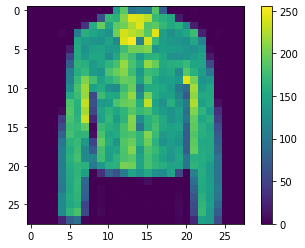

In [93]:
plt.figure()
plt.imshow(test_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [94]:
selectimageid=10

In [95]:
model.evaluate(test_images[selectimageid:(selectimageid+1)], test_labels[selectimageid:(selectimageid+1)], verbose=2)

1/1 - 0s - loss: 0.8755 - accuracy: 1.0000


[0.8755269050598145, 1.0]

In [96]:
test_labels[selectimageid:(selectimageid+1)] #Ground Truth

array([4], dtype=uint8)

In [97]:
model.predict(test_images[selectimageid:(selectimageid+1)])

array([[1.7137366e-03, 4.2799144e-04, 3.8329640e-01, 1.3233942e-03,
        4.1664243e-01, 1.8976743e-21, 1.9616550e-01, 0.0000000e+00,
        4.3048710e-04, 2.0383293e-31]], dtype=float32)

In [98]:
np.argmax(model.predict(test_images[selectimageid:(selectimageid+1)]))

4